# Amazon India Sales EDA

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset

In [2]:
df_domestic = pd.read_csv('Raw Amazon Sale Report.csv',index_col=0,low_memory=False)

## Exploring Dataset

In [3]:
df_domestic.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
index,,,,,,,,,,,,,,,,,,,,,
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [4]:
df_domestic.shape

(128975, 23)

In [5]:
df_domestic.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [6]:
df_domestic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128975 entries, 0 to 128974
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128975 non-null  object 
 1   Date                128975 non-null  object 
 2   Status              128975 non-null  object 
 3   Fulfilment          128975 non-null  object 
 4   Sales Channel       128975 non-null  object 
 5   ship-service-level  128975 non-null  object 
 6   Style               128975 non-null  object 
 7   SKU                 128975 non-null  object 
 8   Category            128975 non-null  object 
 9   Size                128975 non-null  object 
 10  ASIN                128975 non-null  object 
 11  Courier Status      122103 non-null  object 
 12  Qty                 128975 non-null  int64  
 13  currency            121180 non-null  object 
 14  Amount              121180 non-null  float64
 15  ship-city           128942 non-null  ob

## Clening Dataset

In [7]:
df_domestic.drop(columns='Unnamed: 22', inplace = True) #Empty Feature

In [8]:
# Percentage of missing values
missing = df_domestic[['promotion-ids', 'fulfilled-by']].isnull().mean() * 100
print(missing)

promotion-ids    38.110487
fulfilled-by     69.546811
dtype: float64


In [9]:
# Almost 70% values from 'fulfilled-by' column are missing.

In [10]:
df_domestic.drop(columns='fulfilled-by', inplace = True)

In [11]:
df_domestic['promotion-ids'].value_counts()

promotion-ids
IN Core Free Shipping 2015/04/08 23-48-5-108                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [12]:
#'promotion-ids' column has 5787 unique values out of which most are long, unreadable strings or duplicated promo IDs. 
# There is No explainability or human-readable mapping. also 38% values are missing.

In [13]:
df_domestic.drop(columns='promotion-ids', inplace = True)

In [14]:
df_domestic.shape

(128975, 20)

In [15]:
# Fixing Datatype of "Date" Column

In [16]:
df_domestic['Date'] = pd.to_datetime(df_domestic['Date'], format='%m-%d-%y', errors='coerce')

In [17]:
# Since we only have record of nly one day from March (31st), it doesn't contribute meaningfully to monthly or Q1 trends.
# Hence droping March 31st to ensure analysis starts cleanly from Q2.

df_domestic = df_domestic[df_domestic['Date'] >= '2022-04-01']

In [18]:
df_domestic[df_domestic['Date'].dt.month == 3]['Date'].dt.date.unique()

array([], dtype=object)

In [19]:
df_domestic.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
index,,,,,,,,,,,,,,,,,,,,
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False


In [20]:
print(df_domestic['Order ID'].value_counts())
print(f'Null Values: {df_domestic['Order ID'].isnull().sum()}')

Order ID
403-4984515-8861958    12
171-5057375-2831560    12
403-0173977-3041148    11
404-9932919-6662730    11
408-3317403-1729937    10
                       ..
408-4323946-0210734     1
403-9660720-7207506     1
403-6231612-3153120     1
407-9521244-5120341     1
171-9198151-1101146     1
Name: count, Length: 120220, dtype: int64
Null Values: 0


In [21]:
print(df_domestic['Status'].value_counts())
print(f'Null Values: {df_domestic['Status'].isnull().sum()}')

Status
Shipped                          77668
Shipped - Delivered to Buyer     28753
Cancelled                        18314
Shipped - Returned to Seller      1952
Shipped - Picked Up                973
Pending                            658
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipping                             8
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: count, dtype: int64
Null Values: 0


In [22]:
# Converting Status in 3 broad categories: Delivered, returns, pending.

In [23]:
def categorize_status(status):
    Success = ["Shipped - Delivered to Buyer","Shipped - Picked Up","Shipped"]
    Failure = ["Cancelled","Shipped - Returned to Seller","Shipped - Returning to Seller","Shipped - Rejected by Buyer","Shipped - Lost in Transit","Shipped - Damaged"]
    Pending = ["Pending","Shipped - Out for Delivery","Pending - Waiting for Pick Up","Shipping"]
    if status in Success:
        return "Delivered"
    elif status in Failure:
        return "Returned"
    elif status in Pending:
        return 'Pending'
    else:
        return "Other"

In [24]:
df_domestic['Status'] = df_domestic['Status'].apply(categorize_status)

In [25]:
df_domestic.sample(3)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
index,,,,,,,,,,,,,,,,,,,,
128809,171-5622534-9662742,2022-06-01,Delivered,Merchant,Amazon.in,Standard,JNE3797,JNE3797-KR-XL,Western Dress,XL,B09SDXRYBG,Shipped,1,INR,735.0,BENGALURU,KARNATAKA,560072.0,IN,False
25929,402-7695558-6282749,2022-04-15,Delivered,Amazon,Amazon.in,Expedited,SET342,SET342-KR-NP-N-XS,Set,XS,B09Q1943PQ,Shipped,1,INR,916.0,Ahmedabad,Gujarat,380015.0,IN,False
118419,404-8522744-9548341,2022-06-08,Delivered,Amazon,Amazon.in,Expedited,JNE3739,JNE3739-KR-XXXL,kurta,3XL,B099NPSHJ2,Shipped,1,INR,431.0,ROBERTSONPET,KARNATAKA,563120.0,IN,False


In [26]:
print(df_domestic['Fulfilment'].value_counts())
print(f'Null Values: {df_domestic['Fulfilment'].isnull().sum()}')

Fulfilment
Amazon      89550
Merchant    39254
Name: count, dtype: int64
Null Values: 0


In [27]:
df_domestic.rename(columns={'Sales Channel ':'Sales Channel'}, inplace = True)  # Removing extra Spaces
print(df_domestic['Fulfilment'].value_counts())
print(f'Null Values: {df_domestic['Fulfilment'].isnull().sum()}')

Fulfilment
Amazon      89550
Merchant    39254
Name: count, dtype: int64
Null Values: 0


In [28]:
print(df_domestic['ship-service-level'].value_counts())
print(f'Null Values: {df_domestic['ship-service-level'].isnull().sum()}')

ship-service-level
Expedited    88467
Standard     40337
Name: count, dtype: int64
Null Values: 0


In [29]:
print(df_domestic['Style'].value_counts())
print(f'Null Values: {df_domestic['Style'].isnull().sum()}')

Style
JNE3797    4221
JNE3405    2257
J0230      1864
SET268     1857
J0341      1628
           ... 
DPT052        1
DPT041        1
DPT032        1
JNE2323       1
SET045        1
Name: count, Length: 1377, dtype: int64
Null Values: 0


In [30]:
print(df_domestic['SKU'].value_counts())
print(f'Null Values: {df_domestic['SKU'].isnull().sum()}')

SKU
JNE3797-KR-L        772
JNE3797-KR-M        656
JNE3797-KR-S        586
JNE3405-KR-L        534
J0230-SKD-M         506
                   ... 
J0152-DR-M            1
SET432-KR-PP-XXL      1
BTM003-XXXL           1
J0319-KR-XXL          1
SAR113                1
Name: count, Length: 7194, dtype: int64
Null Values: 0


In [31]:
print(df_domestic['Category'].value_counts())
print(f'Null Values: {df_domestic['Category'].isnull().sum()}')

Category
Set              50209
kurta            49801
Western Dress    15491
Top              10613
Ethnic Dress      1158
Blouse             925
Bottom             440
Saree              164
Dupatta              3
Name: count, dtype: int64
Null Values: 0


In [32]:
print(df_domestic['Size'].value_counts())
print(f'Null Values: {df_domestic['Size'].isnull().sum()}')

Size
M       22681
L       22095
XL      20850
XXL     18069
S       17070
3XL     14800
XS      11150
6XL       736
5XL       548
4XL       427
Free      378
Name: count, dtype: int64
Null Values: 0


In [33]:
print(df_domestic['ASIN'].value_counts())
print(f'Null Values: {df_domestic['ASIN'].isnull().sum()}')

ASIN
B09SDXFFQ1    772
B09SDY8DCT    656
B09SDYQ3WG    586
B081WSCKPQ    534
B08XNJG8B1    506
             ... 
B09Y3QNKD9      1
B089G184QQ      1
B08BFFYNB5      1
B08V1KSHHQ      1
B09Y3DZ492      1
Name: count, Length: 7189, dtype: int64
Null Values: 0


In [34]:
print(df_domestic['Courier Status'].value_counts())
print(f'Null Values: {df_domestic['Courier Status'].isnull().sum()}')

Courier Status
Shipped      109335
Unshipped      6677
Cancelled      5926
Name: count, dtype: int64
Null Values: 6866


In [35]:
# As "Courier Status" column has around 5% missing values, Replacing it with 'unknown'
df_domestic['Courier Status'] = df_domestic['Courier Status'].fillna('Unknown')

In [36]:
print(df_domestic['Qty'].value_counts())
print(f'Null Values: {df_domestic['Qty'].isnull().sum()}')

Qty
1     115624
0      12792
2        341
3         32
4          9
5          2
9          1
15         1
13         1
8          1
Name: count, dtype: int64
Null Values: 0


In [37]:
print(df_domestic['currency'].value_counts())
print(df_domestic['ship-country'].value_counts())

currency
INR    121018
Name: count, dtype: int64
ship-country
IN    128771
Name: count, dtype: int64


In [38]:
# Both 'currency' and 'ship-country' has only one unique value.
# As it is domestic report of India these values are obvious and does not add any value. So it's better to drop them.
df_domestic.drop(columns = ["currency","ship-country"], inplace = True)

In [39]:
print(df_domestic['Amount'].value_counts())
print(f'Null Values: {df_domestic['Amount'].isnull().sum()}')

Amount
399.00     5439
771.00     2797
735.00     2436
0.00       2343
487.00     2293
           ... 
450.48        1
1014.00       1
619.05        1
683.81        1
1064.29       1
Name: count, Length: 1409, dtype: int64
Null Values: 7786


In [40]:
# Replacing Null Values with 0
df_domestic['Amount'] = df_domestic['Amount'].fillna(0)

In [41]:
print(df_domestic['ship-city'].value_counts())
print(f'Null Values: {df_domestic['ship-city'].isnull().sum()}')

ship-city
BENGALURU           11201
HYDERABAD            8066
MUMBAI               6121
NEW DELHI            5786
CHENNAI              5413
                    ...  
dimapur                 1
Near Shauchaley         1
Pilani                  1
Kottagoundampati        1
Kakkanad, kochi         1
Name: count, Length: 8952, dtype: int64
Null Values: 33


In [42]:
# Standardizing city feature by converting to title case and removing extra spaces.
df_domestic['ship-city']=df_domestic['ship-city'].str.title().str.strip()

In [43]:
df_domestic['ship-city'].value_counts()

ship-city
Bengaluru          11881
Hyderabad           9117
Mumbai              7116
New Delhi           6331
Chennai             6276
                   ...  
Chogawan               1
Bileipada              1
Achalpur               1
Chalakkal,Aluva        1
Amravati.              1
Name: count, Length: 7294, dtype: int64

In [44]:
#pip install thefuzz

### Fuzzy Matching for 'ship-city' Standardization

There are 7297 Unique Values in "ship-city" column and most of it is just noise, trying to reduce it.

- First, missing values are filled with `'Unknown'`.
- The 500 most common city names are used as reference points.
- Fuzzy string matching is applied using the `thefuzz` library to map less common or misspelled city names to their closest match.
- Only matches with a similarity score ≥ 85 are accepted to avoid incorrect mappings.

The cleaned values are stored in a new column: `clean_ship-city`.


In [45]:
from thefuzz import process


df_domestic['ship-city'] = df_domestic['ship-city'].fillna('Unknown').astype(str)


city_counts = df_domestic['ship-city'].value_counts()
reference_cities = city_counts.head(500).index.tolist() 


def get_closest_city(name, reference_list, threshold=85):
    if not isinstance(name, str) or name.strip() == '':
        return 'Unknown'
    match, score = process.extractOne(name, reference_list)
    return match if score >= threshold else name  

df_domestic['clean_ship-city'] = df_domestic['ship-city'].apply(
    lambda x: get_closest_city(x, reference_cities)
)

In [46]:
df_domestic['clean_ship-city'].value_counts()

clean_ship-city
Bengaluru         11952
Hyderabad          9217
Mumbai             7376
New Delhi          6391
Chennai            6366
                  ...  
Movva. Mandal         1
Saunda                1
Jamtaraj              1
Howajan,Gohpur        1
Avadi                 1
Name: count, Length: 5032, dtype: int64

Even after cleaning there are 5050 unique cities, hence mapping few of the common cities manually And then dividing them into broad Tiers.

In [47]:
manual_city_mapping = {
    "Bangalore": "Bengaluru",
    "Navi Mumbai": "Mumbai",
    "New Delhi": "Delhi",
    "South Delhi": "Delhi",
    "East Delhi": "Delhi",
    "Greater Noida West": "Greater Noida",
    "Thane West": "Thane",
    "Dombivli East": "Dombivli",
    "Dombivli West": "Dombivli",
    "Dombivali": "Dombivli",
    "Trivandrum": "Thiruvananthapuram",
    "Mysore": "Mysuru",
    "Gurgaon": "Gurugram",
    "Vasai": "Vasai Virar",
    "Calicut": "Kozhikode",
    "Pondicherry": "Puducherry",
    "Kalyan West": "Kalyan",
    "Bidhan Nagar": "Kolkata",
    "New Town": "Kolkata",
    "Gautam Buddha Nagar": "Noida",
    "Panaji": "Goa",
    "Vasco Da Gama": "Goa",
    "Mapusa": "Goa",
    "Ponda": "Goa",
    "Porvorim": "Goa",
    "Curchorem": "Goa",
    "Quepem": "Goa",
    "Colvale": "Goa",
    "North Goa": "Goa",
    "South Goa": "Goa",
    "Kochi": "Ernakulam",
    "Thrippunithura": "Ernakulam",
    "Kakkanad": "Ernakulam",
    "Aluva": "Ernakulam",
    "Chengannur": "Alappuzha",
    "Kayamkulam": "Alappuzha",
    "Paravur": "Alappuzha",
    "Ettumanoor": "Kottayam",
    "Changanacherry": "Kottayam",
    "Perinthalmanna": "Malappuram",
    "Manjeri": "Malappuram",
    "Kunnathunad": "Ernakulam",
    "Malda": "West Bengal",
    "Siliguri": "West Bengal",
    "Darjeeling": "West Bengal",
    "North 24 Parganas": "Kolkata",
    "Barrackpore": "Kolkata",
    "Rajpur Sonarpur": "Kolkata",
    "Serampore": "Kolkata",
    "Uttarpara Kotrung": "Kolkata",
    "Mirzapur Cum Vindhyachal": "Mirzapur",
    "Prayagraj": "Allahabad",
}

In [48]:
df_domestic['clean_ship-city'] = df_domestic['clean_ship-city'].replace(manual_city_mapping)

In [49]:
df_domestic['clean_ship-city'].value_counts()

clean_ship-city
Bengaluru       13380
Hyderabad        9217
Mumbai           8786
Delhi            6903
Chennai          6366
                ...  
Achalpur            1
Kelveroad           1
Pattabiram          1
Bande               1
Nereducherla        1
Name: count, Length: 4984, dtype: int64

In [50]:
tier_1 = [
    "Mumbai", "Delhi", "Bengaluru", "Chennai","Hyderabad", "Kolkata", "Pune","Ahmedabad" 
]

tier_2 = [
    "Surat", "Jaipur", "Lucknow", "Nagpur", "Kanpur", "Indore", "Bhopal",
    "Patna", "Coimbatore", "Visakhapatnam", "Vadodara", "Thane", "Noida", "Gurgaon", "Gurugram",
    "Faridabad", "Ludhiana", "Amritsar", "Rajkot", "Ranchi", "Varanasi", "Vijayawada", "Madurai",
    "Raipur", "Jamshedpur", "Dehradun", "Guwahati", "Mysore", "Chandigarh", "Nashik",
    "Thrissur", "Trivandrum", "Thiruvananthapuram", "Ernakulam", "Pimpri Chinchwad"
]

def assign_tier(city):
    city = city.strip()
    if city in tier_1:
        return 'Tier 1'
    elif city in tier_2:
        return "Tier 2"
    else:
        return 'Tier 3'

In [51]:
df_domestic['Tier'] = df_domestic['clean_ship-city'].apply(assign_tier)

In [52]:
# Dropping the raw 'ship-city' column and replacing it with cleaned one.
df_domestic.drop(columns='ship-city',inplace = True)
ship_index = df_domestic.columns.get_loc('Amount') 
df_domestic.insert(ship_index + 1, 'clean_ship-city', df_domestic.pop('clean_ship-city'))
df_domestic.rename(columns={"clean_ship-city":"ship-city"}, inplace=True)

In [53]:
# Shifting 'tier' column next to 'ship-city' column
tier_index = df_domestic.columns.get_loc('ship-city') 
df_domestic.insert(tier_index + 1, 'Tier', df_domestic.pop('Tier'))

In [54]:
df_domestic.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,Tier,ship-state,ship-postal-code,B2B
index,,,,,,,,,,,,,,,,,,,
0,405-8078784-5731545,2022-04-30,Returned,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,Unknown,0,647.62,Mumbai,Tier 1,MAHARASHTRA,400081.0,False
1,171-9198151-1101146,2022-04-30,Delivered,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.00,Bengaluru,Tier 1,KARNATAKA,560085.0,False
2,404-0687676-7273146,2022-04-30,Delivered,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.00,Mumbai,Tier 1,MAHARASHTRA,410210.0,True
3,403-9615377-8133951,2022-04-30,Returned,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,Unknown,0,753.33,Puducherry,Tier 3,PUDUCHERRY,605008.0,False
4,407-1069790-7240320,2022-04-30,Delivered,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.00,Chennai,Tier 1,TAMIL NADU,600073.0,False


In [55]:
print(df_domestic['ship-state'].value_counts())
print(f'Null Values: {df_domestic['ship-state'].isnull().sum()}')

ship-state
MAHARASHTRA      22236
KARNATAKA        17302
TAMIL NADU       11469
TELANGANA        11322
UTTAR PRADESH    10619
                 ...  
Nagaland             1
Mizoram              1
bihar                1
rajsthan             1
Rajsthan             1
Name: count, Length: 69, dtype: int64
Null Values: 33


In [56]:
# Standardizing 'ship-state' feature by converting to title case and removing extra spaces & Assigning proper values of states.
df_domestic['ship-state']=df_domestic['ship-state'].str.title().str.strip()

state_corrections = {
    'New Delhi': 'Delhi',
    'Orissa': 'Odisha',
    'Rajshthan': 'Rajasthan',
    'Rajsthan': 'Rajasthan',
    'Rj': 'Rajasthan',
    'Punjab/Mohali/Zirakpur': 'Punjab',
    'Pb': 'Punjab',
    'Pondicherry': 'Puducherry',
    'Dadra And Nagar': 'Dadra and Nagar Haveli and Daman and Diu',
    'Apo': 'Unknown',
    'Ar': 'Arunachal Pradesh',
    'Nl': 'Nagaland'
}

df_domestic['ship-state'] = df_domestic['ship-state'].replace(state_corrections)
df_domestic['ship-state'] = df_domestic['ship-state'].fillna('Unknown')

In [57]:
print(df_domestic['ship-state'].value_counts())
print(f'Null Values: {df_domestic['ship-state'].isnull().sum()}')

ship-state
Maharashtra                                 22236
Karnataka                                   17302
Tamil Nadu                                  11469
Telangana                                   11322
Uttar Pradesh                               10619
Delhi                                        7038
Kerala                                       6576
West Bengal                                  5947
Andhra Pradesh                               5425
Gujarat                                      4480
Haryana                                      4407
Rajasthan                                    2715
Madhya Pradesh                               2527
Odisha                                       2133
Bihar                                        2108
Punjab                                       1919
Assam                                        1663
Uttarakhand                                  1552
Jharkhand                                    1454
Goa                                    

In [58]:
print(df_domestic['ship-postal-code'].value_counts())
print(f'Null Values: {df_domestic['ship-postal-code'].isnull().sum()}')

ship-postal-code
201301.0    1004
122001.0     687
560037.0     632
560068.0     619
560076.0     579
            ... 
441908.0       1
680591.0       1
364060.0       1
673581.0       1
636304.0       1
Name: count, Length: 9459, dtype: int64
Null Values: 33


In [59]:
# Assigning 0 to null values and changing data type from float to int.
df_domestic['ship-postal-code'] = df_domestic['ship-postal-code'].fillna(0)
df_domestic['ship-postal-code'] = df_domestic['ship-postal-code'].astype(int)

In [60]:
df_domestic['ship-postal-code'].dtype

dtype('int64')

In [61]:
print(df_domestic['ship-postal-code'].value_counts())
print(f'Null Values: {df_domestic['ship-postal-code'].isnull().sum()}')

ship-postal-code
201301    1004
122001     687
560037     632
560068     619
560076     579
          ... 
563116       1
441908       1
680591       1
364060       1
562138       1
Name: count, Length: 9460, dtype: int64
Null Values: 0


In [62]:
print(df_domestic['B2B'].value_counts())
print(f'Null Values: {df_domestic['B2B'].isnull().sum()}')

B2B
False    127933
True        871
Name: count, dtype: int64
Null Values: 0


In [63]:
df_domestic.head(3)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,Tier,ship-state,ship-postal-code,B2B
index,,,,,,,,,,,,,,,,,,,
0,405-8078784-5731545,2022-04-30,Returned,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,Unknown,0,647.62,Mumbai,Tier 1,Maharashtra,400081,False
1,171-9198151-1101146,2022-04-30,Delivered,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.00,Bengaluru,Tier 1,Karnataka,560085,False
2,404-0687676-7273146,2022-04-30,Delivered,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.00,Mumbai,Tier 1,Maharashtra,410210,True


## Exporting Data

In [64]:
df_domestic.to_csv("Amazon Sale Report.csv", index=False)

## Exploratory Data Analysis

In [65]:
df_domestic.shape

(128804, 19)

In [66]:
df_domestic.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,Tier,ship-state,ship-postal-code,B2B
index,,,,,,,,,,,,,,,,,,,
0,405-8078784-5731545,2022-04-30,Returned,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,Unknown,0,647.62,Mumbai,Tier 1,Maharashtra,400081,False
1,171-9198151-1101146,2022-04-30,Delivered,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.00,Bengaluru,Tier 1,Karnataka,560085,False
2,404-0687676-7273146,2022-04-30,Delivered,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.00,Mumbai,Tier 1,Maharashtra,410210,True
3,403-9615377-8133951,2022-04-30,Returned,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,Unknown,0,753.33,Puducherry,Tier 3,Puducherry,605008,False
4,407-1069790-7240320,2022-04-30,Delivered,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.00,Chennai,Tier 1,Tamil Nadu,600073,False


In [67]:
df_domestic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128804 entries, 0 to 128974
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Order ID            128804 non-null  object        
 1   Date                128804 non-null  datetime64[ns]
 2   Status              128804 non-null  object        
 3   Fulfilment          128804 non-null  object        
 4   Sales Channel       128804 non-null  object        
 5   ship-service-level  128804 non-null  object        
 6   Style               128804 non-null  object        
 7   SKU                 128804 non-null  object        
 8   Category            128804 non-null  object        
 9   Size                128804 non-null  object        
 10  ASIN                128804 non-null  object        
 11  Courier Status      128804 non-null  object        
 12  Qty                 128804 non-null  int64         
 13  Amount              128804 non-nul

### Univariate Analysis

In [68]:
df_domestic[['Amount',"Qty"]].describe()

,Amount,Qty
count,128804.000000,128804.000000
mean,609.383206,0.904421
std,313.379566,0.313392
min,0.000000,0.000000
25%,413.000000,1.000000
50%,583.040000,1.000000
75%,771.000000,1.000000
max,5584.000000,15.000000


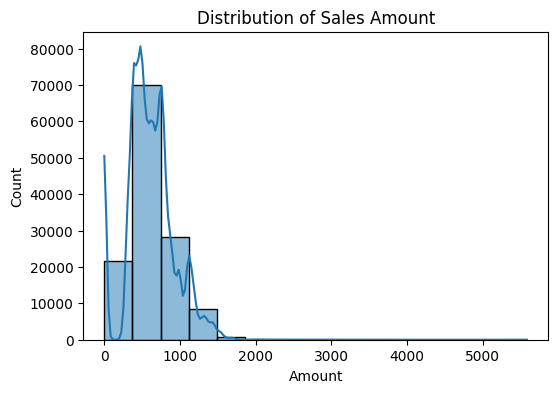

In [69]:
# Checking Distribution of 'Amount'

plt.figure(figsize=(6,4))
sns.histplot(df_domestic['Amount'], bins=15, kde = True)
plt.title('Distribution of Sales Amount')
plt.show()

* The Value of most orders is in under 1000 INR
* Highest Sale Amount is 5584 INR and as seen in the graph there are significant number of outliers.

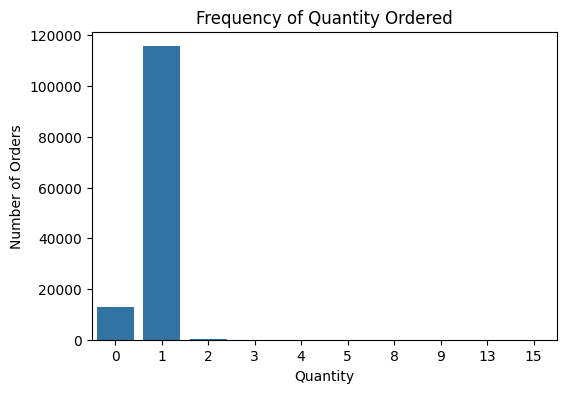

In [70]:
# Lets check the most ordered quantity
quantity = df_domestic['Qty'].value_counts().sort_index()

plt.figure(figsize=(6, 4))
sns.barplot(x=quantity.index, y=quantity.values)
plt.title('Frequency of Quantity Ordered')
plt.xlabel('Quantity')
plt.ylabel('Number of Orders')
plt.show()

* Most orders have quantity 1. and 0 quantity indicating cancelled or returned orders.
* This pattern confirms typical Bussiness to Customer behaviour.

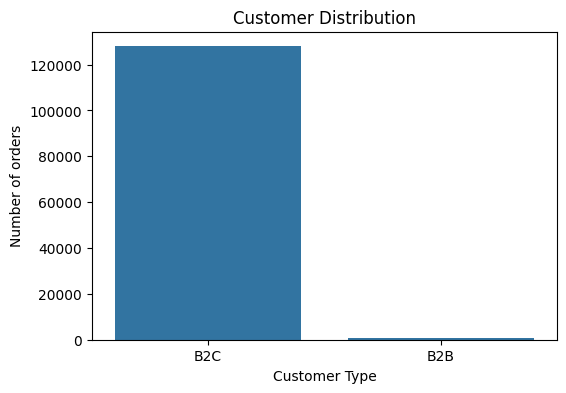

In [71]:
# Lets check B2B and B2C Distribution
df_domestic['Customer_Type'] = df_domestic['B2B'].map({True: 'B2B', False: 'B2C'})

plt.figure(figsize=(6, 4))
sns.countplot(df_domestic, x = 'Customer_Type')
plt.title('Customer Distribution')
plt.xlabel('Customer Type')
plt.ylabel('Number of orders')
plt.show()

* The plot clearly indicates that the majority of sales are directed toward individual customers.

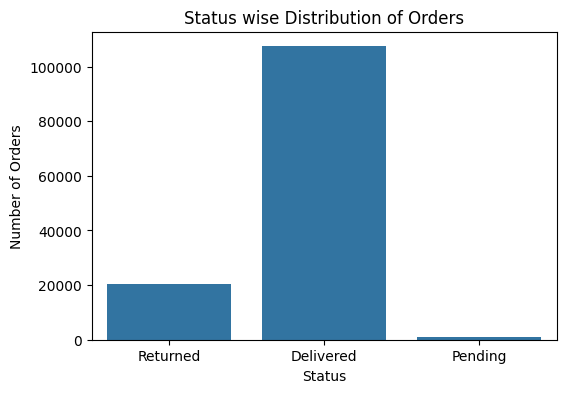

In [72]:
# Order Status

plt.figure(figsize=(6, 4))
sns.countplot(df_domestic, x= 'Status')
plt.title("Status wise Distribution of Orders")
plt.ylabel("Number of Orders")
plt.show()

* Over 1 lakh orders are dilivered which shows strong fulfillment
* Returned Orders are above 20000 which might indicate issues related quality of product or dissatisfaction of customer or maybe incorrect deliveries. This needs attention.

In [73]:
df_domestic["Fulfilment"].value_counts()

Fulfilment
Amazon      89550
Merchant    39254
Name: count, dtype: int64

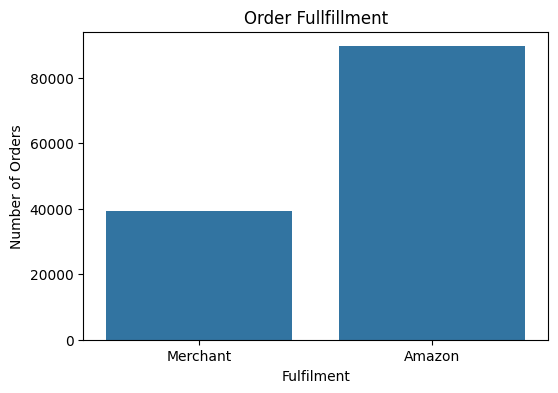

In [74]:
# Amazon Vs. Merchant Fullfillment

plt.figure(figsize=(6, 4))
sns.countplot(df_domestic, x= 'Fulfilment')
plt.title("Order Fullfillment")
plt.ylabel("Number of Orders")
plt.show()

* Approximately 70% of orders are fulfilled by Amazon and 30% by Merchant

In [75]:
df_domestic["Category"].value_counts()

Category
Set              50209
kurta            49801
Western Dress    15491
Top              10613
Ethnic Dress      1158
Blouse             925
Bottom             440
Saree              164
Dupatta              3
Name: count, dtype: int64

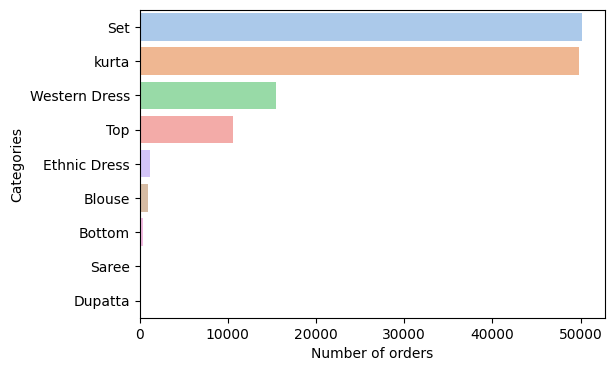

In [76]:
# Category Count
category_dist = df_domestic["Category"].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(y=category_dist.index, x = category_dist.values, hue = category_dist.index,palette = 'pastel')
plt.ylabel('Categories')
plt.xlabel('Number of orders')
plt.show()

* Top selling product categories are Set and Kurta, while Western Dress and Top also making descent sale.
* Categories like Bottom, Saree, Dupatta have very minimal sale.

## Bivariate Analysis

In [77]:
df_domestic.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,Tier,ship-state,ship-postal-code,B2B,Customer_Type
index,,,,,,,,,,,,,,,,,,,,
0,405-8078784-5731545,2022-04-30,Returned,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,Unknown,0,647.62,Mumbai,Tier 1,Maharashtra,400081,False,B2C
1,171-9198151-1101146,2022-04-30,Delivered,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.00,Bengaluru,Tier 1,Karnataka,560085,False,B2C
2,404-0687676-7273146,2022-04-30,Delivered,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.00,Mumbai,Tier 1,Maharashtra,410210,True,B2B
3,403-9615377-8133951,2022-04-30,Returned,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,Unknown,0,753.33,Puducherry,Tier 3,Puducherry,605008,False,B2C
4,407-1069790-7240320,2022-04-30,Delivered,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.00,Chennai,Tier 1,Tamil Nadu,600073,False,B2C


In [78]:
# Monthly Revenue and Quantity of various products sold

df_domestic["Month"] = df_domestic['Date'].dt.to_period('M')

monthly_stats = df_domestic.groupby('Month').agg({
    "Amount": 'sum',
    "Qty":'sum'
}).reset_index()

monthly_stats['Month'] = monthly_stats['Month'].astype(str)
print(monthly_stats)

     Month       Amount    Qty
0  2022-04  28838708.32  44206
1  2022-05  26226476.75  38011
2  2022-06  23425809.38  34276


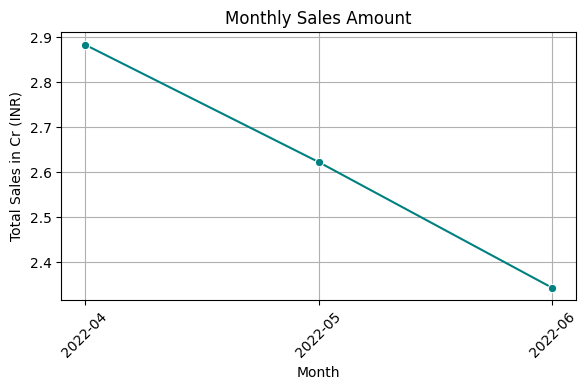

In [79]:
plt.figure(figsize=(6,4))

monthly_stats['Amount_Cr'] = monthly_stats['Amount']/1e7
sns.lineplot(data=monthly_stats, x='Month', y='Amount_Cr', marker='o', color='teal')
plt.title('Monthly Sales Amount')
plt.xlabel('Month')
plt.ylabel('Total Sales in Cr (INR)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

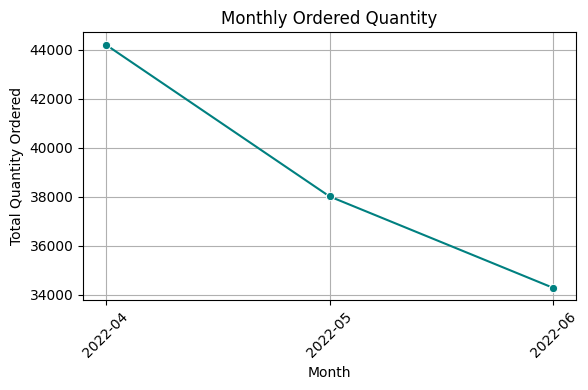

In [80]:
plt.figure(figsize=(6,4))
sns.lineplot(data=monthly_stats, x='Month', y='Qty', marker='o', color='teal')
plt.title('Monthly Ordered Quantity')
plt.xlabel('Month')
plt.ylabel('Total Quantity Ordered')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Insight:
- Month of April has the highest sale of 2.88 Cr with over 44,200 units sold
- Yet it is observed that both sales and ordered quantity has declined over the quarter 2.

In [81]:
# Lets look into Category wise Sales Patterns.
Category_wise_sales = df_domestic.groupby(["Category"])['Amount'].sum().sort_values(ascending = False)

In [82]:
Category_wise_sales

Category
Set              39150240.03
kurta            21265290.13
Western Dress    11208419.41
Top               5343281.30
Ethnic Dress       790118.66
Blouse             458128.18
Bottom             150667.98
Saree              123933.76
Dupatta               915.00
Name: Amount, dtype: float64

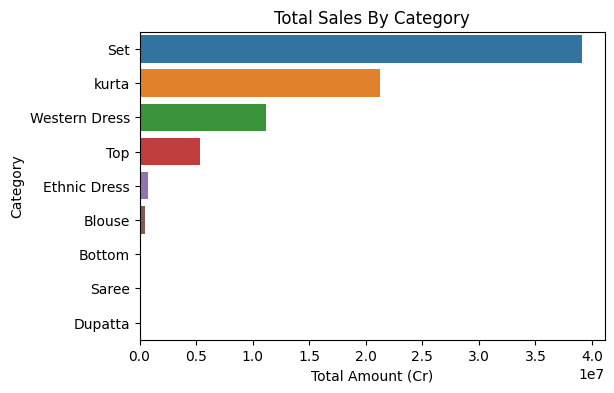

In [83]:
plt.figure(figsize=(6,4))
sns.barplot(x=Category_wise_sales.values, y =Category_wise_sales.index, hue =Category_wise_sales.index)
plt.title('Total Sales By Category')
plt.xlabel('Total Amount (Cr)')
plt.show()

In [84]:
# Sales and Quantity ordered by Tiers

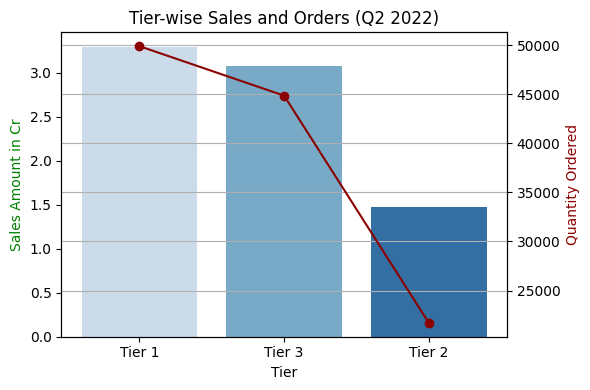

In [85]:
tier_stats = df_domestic.groupby(by='Tier')[['Amount',"Qty"]].sum().sort_values('Amount', ascending=False).reset_index()
tier_stats['Amount_Cr'] = tier_stats['Amount'] / 1e7

plt.figure(figsize=(6,4))

bar = sns.barplot(data=tier_stats, x='Tier', y='Amount_Cr', hue = 'Tier', palette='Blues')

line = bar.twinx()
line.plot(tier_stats['Tier'],tier_stats['Qty'], color='darkred', marker='o', label='Quantity Ordered')

bar.set_ylabel('Sales Amount in Cr', color='green')
line.set_ylabel('Quantity Ordered', color='darkred')
plt.title('Tier-wise Sales and Orders (Q2 2022)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [86]:
df_domestic[['ship-city', 'Tier']].drop_duplicates().groupby('Tier').count()

,ship-city
Tier,
Tier 1,8
Tier 2,32
Tier 3,4944


### Insight:
* Tier 1 cities contributed the highest revenue and order volume, highlighting high customer value and purchasing power concentrated in major metropolitan areas.
* Surprisingly, Tier 3 cities despite being around 4,944 in number generated nearly the same revenue as Tier 1, showing that the long-tail of small towns collectively forms a massive market.
* Tier 2 cities contributed noticeably less, indicating either a mid-market gap in demand or weaker sales penetration compared to Tier 1 and Tier 3 regions.

In [87]:
# Tier wise count of each Delivery Status
tier_status_counts = df_domestic.groupby(['Tier', 'Status']).size().unstack().fillna(0)

tier_status_counts['Return Rate (%)'] = (tier_status_counts['Returned'] / 
                                         (tier_status_counts['Delivered'] + tier_status_counts['Returned'] + tier_status_counts['Pending'])) * 100

print(tier_status_counts[['Returned', 'Delivered', 'Pending', 'Return Rate (%)']])

Status  Returned  Delivered  Pending  Return Rate (%)
Tier                                                 
Tier 1      7629      46395      396        14.018743
Tier 2      3609      20140      178        15.083379
Tier 3      9190      40859      408        18.213528


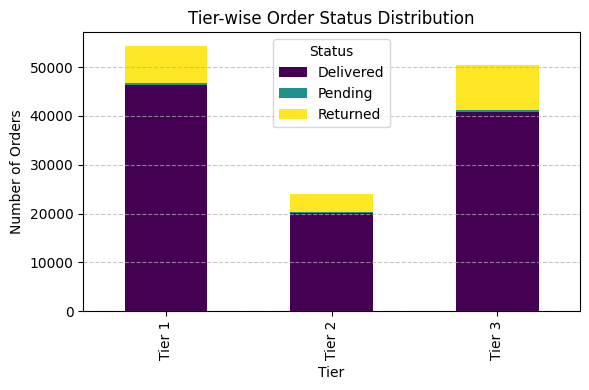

In [88]:
tier_status = df_domestic.groupby(['Tier', 'Status']).size().unstack().fillna(0)

tier_status.plot(kind='bar', stacked=True, figsize=(6, 4), colormap='viridis')

plt.title('Tier-wise Order Status Distribution')
plt.xlabel('Tier')
plt.ylabel('Number of Orders')
plt.legend(title='Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Insight

* Tier 1 cities had the highest number of delivered orders and the lowest return rate at ~14%, as it might have better and efficient fulfillment and higher customer satisfaction in metro regions.

* Tier 2 cities saw moderate order volume, but a slightly higher return rate of ~15%, which may be the result of service quality gaps.

* whereas Tier 3 cities, despite being the largest group by location count, had a significantly higher return rate at ~18%, which might indicate Logistics challenges.

## 📌 Final Summary & Business Insights

After performing EDA on Amazon India sales data for Q2 2022, we derived the following key insights:

- **Category Performance**: Certain product categories significantly outperform others in terms of revenue. These categories should be prioritized in marketing and inventory planning.
- **Tier Analysis**:
  - **Tier 1** cities lead in both sales volume and fulfillment efficiency.
  - **Tier 3** cities, although small individually, collectively contribute as much as Tier 1 in revenue, highlighting their strategic importance.
  - **Tier 2** cities underperform and could benefit from targeted strategies.
- **Returns and Fulfillment**: Return rates are highest in Tier 3, likely due to logistical challenges or unmet expectations. Fulfillment improvement in these areas could yield better retention and profitability.

## ✅ Recommendations:
- Focus on improving delivery and customer service in Tier 3 cities.
- Optimize inventory and marketing for top-performing categories.
- Investigate why Tier 2 cities are lagging—consider promotions, faster delivery, or localized strategies.

---